In [ ]:
# ФИО: Михайлова Ксения  Проектная работа по модулю “Построение моделей”

In [1]:
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 35)
pd.set_option('display.max_columns', 35)
import numpy as np
from scipy import stats

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm

import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#1 Загрузить данные 

In [2]:
train = pd.read_csv('mod/train_m.csv')

In [3]:
#test = pd.read_csv('mod/test_m.csv')

In [3]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
#test.head()

In [5]:
#2 Провести описательный анализ предложенных данных

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
#test.info()

In [8]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,...,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,...,8.612395e+03,1.495653e+04,1.308216e+04,41.820444,0.526626,52.078775,31.879418,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,12888.030000,16566.810000,45990.000000,131100.000000,47598.090000,45990.000000,...,2.368559e+06,3.998687e+06,3.525777e+06,10430.010000,145.200000,13793.670000,7331.340000,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [10]:
#данные являются несбалансированными, что плохо для решения задачи классификации

In [11]:
train_X = train.drop(['TARGET', 'ID'], axis=1)
train_y = train['TARGET']

In [12]:
#3 Провести анализ корреляции переменных, отобразить взаимосвязи между переменными

In [13]:
corr = train_X.corr()
corr

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,...,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
var3,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,0.001311,0.005916,0.006764,0.001676,0.002459,0.003993,0.001695,0.002474,...,0.000234,0.000166,0.000347,0.000331,0.000199,0.000143,0.000191,0.000229,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071
var15,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,0.035884,0.088145,0.093354,0.085281,0.074686,0.104643,0.085215,0.074783,...,0.015796,0.011859,0.020383,0.019886,0.007891,-0.002859,0.010679,0.011623,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497
imp_ent_var16_ult1,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,0.011502,0.040879,0.034387,0.020975,0.015883,0.035100,0.020869,0.015921,...,-0.000313,-0.000226,-0.000396,-0.000403,-0.000272,-0.000194,0.004478,0.007428,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007
imp_op_var39_comer_ult1,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,0.249247,0.961781,0.856878,0.289993,0.261390,0.647756,0.289901,0.262532,...,0.000145,-0.000784,0.000062,0.000156,-0.001087,-0.000773,0.000412,0.001123,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546
imp_op_var39_comer_ult3,0.006817,0.101177,0.034879,0.886476,1.000000,0.316671,0.355670,0.029094,0.055449,0.247707,0.848845,0.959840,0.267052,0.280200,0.565997,0.266931,0.281297,...,0.000402,-0.000698,0.000239,0.000260,-0.000988,0.023553,-0.000165,0.000192,0.027489,0.021819,0.018427,0.020530,0.008539,0.006359,0.010660,0.009822,0.013271
imp_op_var40_comer_ult1,0.001518,0.042754,0.009896,0.342709,0.316671,1.000000,0.852206,0.061187,0.106558,0.705267,0.072373,0.081950,0.089652,0.073140,0.097676,0.092551,0.076952,...,-0.000046,-0.000105,0.000678,0.000776,-0.000195,-0.000139,-0.000186,-0.000224,0.003191,0.006769,0.001773,0.002694,-0.000436,-0.000480,-0.000254,-0.000372,0.016628
imp_op_var40_comer_ult3,0.001690,0.048512,0.009377,0.295295,0.355670,0.852206,1.000000,0.053579,0.110342,0.648953,0.065112,0.079183,0.065168,0.060999,0.071776,0.067795,0.065001,...,0.000860,0.000195,0.001348,0.001223,-0.000215,-0.000153,-0.000205,-0.000246,0.005885,0.010836,0.003285,0.004882,-0.000561,-0.000529,-0.000510,-0.000601,0.015584
imp_op_var40_efect_ult1,0.000530,0.008805,0.000592,0.032280,0.029094,0.061187,0.053579,1.000000,0.887375,0.265720,0.016437,0.014948,0.088462,0.062037,0.077873,0.145026,0.095789,...,-0.000080,-0.000057,-0.000118,-0.000113,-0.000069,-0.000049,-0.000066,-0.000079,-0.000235,-0.000162,-0.000210,-0.000220,-0.000211,-0.000170,-0.000254,-0.000268,-0.000315
imp_op_var40_efect_ult3,0.000611,0.009678,0.002510,0.054809,0.055449,0.106558,0.110342,0.887375,1.000000,0.267603,0.027130,0.026020,0.095818,0.076602,0.090371,0.145895,0.114612,...,-0.000092,-0.000066,-0.000136,-0.000130,-0.000079,-0.000056,-0.000076,-0.000091,-0.000270,-0.000186,-0.000242,-0.000253,-0.000243,-0.000195,-0.000292,-0.000308,0.000682
imp_op_var40_ult1,0.001311,0.035884,0.011502,0.249247,0.247707,0.705267,0.648953,0.265720,0.267603,1.000000,0.059053,0.069404,0.081886,0.068833,0.091457,0.096527,0.078828,...,-0.000070,-0.000080,0.000704,0.000815,-0.000169,-

In [14]:
correlated_features = set() 

In [15]:
for i in range(len(corr.columns)):  
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [16]:
len(correlated_features) 

203

In [17]:
print(correlated_features)  

{'imp_op_var40_comer_ult3', 'saldo_var13_medio', 'num_var13_largo', 'num_var18', 'num_trasp_var33_out_ult1', 'ind_var13_corto_0', 'num_op_var40_ult3', 'delta_num_aport_var13_1y3', 'num_var29_0', 'ind_var29', 'num_var29', 'imp_amort_var18_ult1', 'num_var25_0', 'num_var30', 'saldo_medio_var17_hace3', 'ind_var37', 'num_op_var40_efect_ult1', 'num_var13_0', 'saldo_medio_var17_ult3', 'delta_num_aport_var17_1y3', 'num_meses_var39_vig_ult3', 'num_var24', 'num_var5_0', 'saldo_medio_var5_ult3', 'num_var1_0', 'delta_num_trasp_var33_in_1y3', 'ind_var29_0', 'delta_num_venta_var44_1y3', 'ind_var25_0', 'ind_var32', 'delta_num_trasp_var33_out_1y3', 'num_var6_0', 'saldo_var18', 'num_var5', 'num_op_var39_comer_ult3', 'saldo_medio_var13_largo_ult1', 'saldo_medio_var44_ult3', 'num_var44_0', 'saldo_medio_var29_ult1', 'ind_var13_medio', 'num_reemb_var13_ult1', 'ind_var18', 'saldo_medio_var12_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var39_efect_ult1', 'num_var13_largo_0', 'num_op_

In [18]:
#

In [19]:
#4 Провести стратегию Feature Selection (попробовать как минимум два различных подхода)

In [20]:
#4.1 убираем константные фичи

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
qconstant_filter = VarianceThreshold(threshold=0.01)  

In [23]:
qconstant_filter.fit(train_X)  

VarianceThreshold(threshold=0.01)

In [24]:
len(train_X.columns[qconstant_filter.get_support()]) 

272

In [25]:
qconstant_columns = [column for column in train_X.columns  
                    if column not in train_X.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))  

97


In [26]:
for column in qconstant_columns:  
    print(column)

ind_var1
ind_var2_0
ind_var2
ind_var6_0
ind_var6
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var34_0
ind_var34
ind_var40
ind_var41
ind_var39
ind_var44_0
ind_var44
ind_var46_0
ind_var46
num_var6_0
num_var6
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var29_0
num_var29
num_var33
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
ind_var7_emit_ult1
ind_var7_recib_ult1
num_var2_0_ult1
num_var2_ult1
num_aport_var33_hace3
num_aport_var33_ult1
num_var7_emit_ult1
num_compra_var44_hace3
num_meses_var

In [27]:
train_clean = qconstant_filter.transform(train_X)  
#test_clean = qconstant_filter.transform(test)

In [28]:
train_X.shape

(76020, 369)

In [29]:
train_clean.shape

(76020, 272)

In [30]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_clean, train_y, test_size=0.40, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

logreg_fs1 = LogisticRegression()
logreg_fs1.fit(X_train1, y_train1)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
#proba_y_log_fs1 = logreg_fs1.predict_proba(train_clean)

In [33]:
logreg_fs1.score(X_test1,y_test1)

0.9606024730334123

In [34]:
#4.2 убираем коррелирующие фичи

In [35]:
train_clean2 = train_X
#test_clean2 = test

In [36]:
train_clean2.drop(labels=correlated_features, axis=1, inplace=True)  
#test_clean2.drop(labels=correlated_features, axis=1, inplace=True)  

In [37]:
train_clean2.shape

(76020, 166)

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_clean2, train_y, test_size=0.40, random_state=42)

In [39]:
logreg_fs2 = LogisticRegression()
logreg_fs2.fit(X_train2, y_train2)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
#proba_y_log_fs2 = logreg_fs2.predict_proba(test_clean)

In [41]:
logreg_fs2.score(X_test2,y_test2)

0.9606024730334123

In [42]:
#Оба подхода показали одинаковый результат

In [43]:
#4.3 L1-based feature selection

In [44]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [45]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(train_X, train_y, test_size=0.40, random_state=42)

In [46]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train3, y_train3)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
model = SelectFromModel(lsvc, prefit=True)

In [48]:
X_new = model.transform(X_train3)

In [49]:
X_new.shape

(45612, 41)

In [50]:
logreg_fsL = LogisticRegression()
logreg_fsL.fit(X_new, y_train3)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
X_new2 = model.transform(X_test3)

In [52]:
X_new2.shape

(30408, 41)

In [53]:
logreg_fsL.score(X_new2,y_test3)

0.960438042620363

In [54]:
#4.4 Feature importances with forests of trees

Feature ranking:
1. feature 165 (0.415069)
2. feature 1 (0.168675)
3. feature 152 (0.049702)
4. feature 149 (0.034880)
5. feature 151 (0.026479)
6. feature 136 (0.026403)
7. feature 73 (0.022652)
8. feature 135 (0.020775)
9. feature 62 (0.020459)
10. feature 14 (0.016306)
11. feature 132 (0.015862)
12. feature 133 (0.015609)
13. feature 79 (0.013508)
14. feature 134 (0.011675)
15. feature 43 (0.010039)
16. feature 49 (0.009751)
17. feature 51 (0.009545)
18. feature 7 (0.009509)
19. feature 3 (0.009284)
20. feature 139 (0.007362)
21. feature 0 (0.006215)
22. feature 75 (0.005960)
23. feature 2 (0.005694)
24. feature 109 (0.005492)
25. feature 131 (0.005337)
26. feature 145 (0.004102)
27. feature 57 (0.003929)
28. feature 108 (0.003450)
29. feature 38 (0.003369)
30. feature 144 (0.003160)
31. feature 37 (0.002553)
32. feature 56 (0.002544)
33. feature 70 (0.002376)
34. feature 50 (0.002354)
35. feature 63 (0.002353)
36. feature 13 (0.002222)
37. feature 121 (0.002133)
38. feature 120 (0.

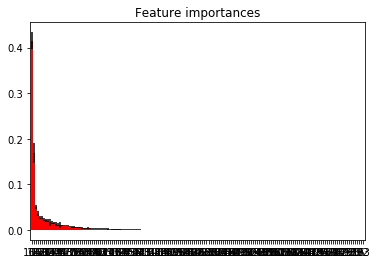

In [55]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train3, y_train3)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train3.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train3.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train3.shape[1]), indices)
plt.xlim([-1, X_train3.shape[1]])
plt.show()

In [56]:
X_train3.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,...,num_var45_hace3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
3100,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,...,0,0,3.00,2.52,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,57289.29
23357,2,27,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,...,0,0,3.00,2.52,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,73056.45
2475,2,36,1890.0,1416.42,0.0,0.0,0.0,1800.0,0.0,0,0,0,0,1,1,0,0,...,15,0,1011.42,8.73,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,127939.83
40236,2,31,0.0,573.84,0.0,0.0,0.0,3450.0,0.0,0,0,0,0,0,0,0,0,...,3,0,244.59,3.84,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,51561.75
17050,2,35,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,...,3,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,132564.51


In [57]:
forest2 = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest2.fit(X_train2, y_train2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 165 (0.415069)
2. feature 1 (0.168675)
3. feature 152 (0.049702)
4. feature 149 (0.034880)
5. feature 151 (0.026479)
6. feature 136 (0.026403)
7. feature 73 (0.022652)
8. feature 135 (0.020775)
9. feature 62 (0.020459)
10. feature 14 (0.016306)
11. feature 132 (0.015862)
12. feature 133 (0.015609)
13. feature 79 (0.013508)
14. feature 134 (0.011675)
15. feature 43 (0.010039)
16. feature 49 (0.009751)
17. feature 51 (0.009545)
18. feature 7 (0.009509)
19. feature 3 (0.009284)
20. feature 139 (0.007362)
21. feature 0 (0.006215)
22. feature 75 (0.005960)
23. feature 2 (0.005694)
24. feature 109 (0.005492)
25. feature 131 (0.005337)
26. feature 145 (0.004102)
27. feature 57 (0.003929)
28. feature 108 (0.003450)
29. feature 38 (0.003369)
30. feature 144 (0.003160)
31. feature 37 (0.002553)
32. feature 56 (0.002544)
33. feature 70 (0.002376)
34. feature 50 (0.002354)
35. feature 63 (0.002353)
36. feature 13 (0.002222)
37. feature 121 (0.002133)
38. feature 120 (0.

In [58]:
X_train2.iloc[[1], [1,149,152,165] ]

,var15,num_var45_hace3,saldo_medio_var5_hace3,var38
23357,27,0,2.52,73056.45


In [59]:
X_FI = X_train2[['var15','var38']]

In [60]:
X_FI.head()

,var15,var38
3100,23,57289.29
23357,27,73056.45
2475,36,127939.83
40236,31,51561.75
17050,35,132564.51


In [61]:
logreg_fi = LogisticRegression()
logreg_fi.fit(X_FI, y_train2)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
X_FI_test = X_test2[['var15','var38']]

In [63]:
logreg_fi.score(X_FI_test,y_test2)

0.9606024730334123

In [64]:
#Оставляем в итоге две фичи

In [65]:
X_preprocS = train_X[['var15','var38']]

In [66]:
X_preprocN = train_X[['var15','var38']]

In [67]:
#5 Шкалировать данные несколькими способами (нормализация, стандартизация). Какой подход лучше?

In [68]:
from sklearn import preprocessing

In [69]:
#5.1

In [70]:
scaler = preprocessing.StandardScaler()

X_preprocS[['var38']] = scaler.fit_transform(X_preprocS[['var38']])
X_preprocS.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,var15,var38
0,23,-0.427183
1,34,-0.372038
2,23,-0.273191
3,37,-0.291398
4,39,0.000412


In [71]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_preprocS, train_y, test_size=0.40, random_state=42)

In [72]:
logreg_fsS = LogisticRegression()
logreg_fsS.fit(X_trainS, y_trainS)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
logreg_fsS.score(X_testS,y_testS)

0.9606024730334123

In [74]:
#5.2

In [75]:
scaler2 = preprocessing.Normalizer()
X_preprocN[['var38']] = scaler2.fit_transform(X_preprocN[['var38']])
X_preprocN.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,var15,var38
0,23,1.0
1,34,1.0
2,23,1.0
3,37,1.0
4,39,1.0


In [76]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_preprocN, train_y, test_size=0.40, random_state=42)

In [77]:
logreg_fsN = LogisticRegression()
logreg_fsN.fit(X_trainN, y_trainN)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
logreg_fsN.score(X_testN,y_testN)

0.9606024730334123

In [79]:
#Выбирать между стандартизацией и нормализацией исходя из данных. В данном случае лучше использовать стандартизацию для улучшения обучения

In [80]:
#6 Попробовать стратегию oversamling и сравнить ее с неизмененной моделью

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
X_trainO, X_testO, y_trainO, y_testO = train_test_split(X_preprocS, train_y, test_size=0.40, random_state=42)

In [83]:
from collections import Counter

In [84]:
sm = SMOTE(random_state=42)

In [85]:
X_res, y_res = sm.fit_resample(X_trainO, y_trainO)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 43802, 1: 43802})


In [86]:
logreg_fsO = LogisticRegression()
logreg_fsO.fit(X_res, y_res)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
logreg_fsO.score(X_testO,y_testO)

0.6858063667455933

In [88]:
#0.9606024730334123 и 0.6858063667455933

In [89]:
#7 Попробовать стратегию undersampling и сравнить ее с неизмененной моделью

In [90]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [91]:
X_trainU, X_testU, y_trainU, y_testU = train_test_split(X_preprocS, train_y, test_size=0.40, random_state=42)

In [92]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res3, y_res3 = nm.fit_resample(X_trainU, y_trainU)

In [93]:
print('Resampled dataset shape %s' % Counter(y_res3))

Resampled dataset shape Counter({0: 1810, 1: 1810})


In [94]:
logreg_fsU = LogisticRegression()
logreg_fsU.fit(X_res3, y_res3)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
logreg_fsU.score(X_testU,y_testU)

0.6304919757958432

In [96]:
from imblearn.under_sampling import InstanceHardnessThreshold

iht = InstanceHardnessThreshold(random_state=42)
X_res4, y_res4 = iht.fit_resample(X_preprocS, train_y)

X_trainU2, X_testU2, y_trainU2, y_testU2 = train_test_split(X_res4, y_res4, test_size=0.40, random_state=42)

In [97]:
logreg_fsU2 = LogisticRegression()
logreg_fsU2.fit(X_trainU2, y_trainU2)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
logreg_fsU2.score(X_testU2,y_testU2)

0.9338084977070557

In [ ]:
#0.9606024730334123 и 0.6858063667455933, 0.9338084977070557 - берем undersampling InstanceHardnessThreshold

In [99]:
#8 Сделать кросс-валидацию тренировочных данных с использованием подхода K-fold (n_folds=10)

In [100]:
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score

#lasso = linear_model.Lasso()
kf = KFold(n_splits=10)
results = cross_val_score(logreg_fsU2, X_testU2, y_testU2, cv=kf)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [101]:
print(results)

[0.92762431 0.93867403 0.92872928 0.93370166 0.93149171 0.9320442
 0.9359116  0.93701657 0.9441989  0.93145384]


In [102]:
#9 Решить задачу бинарной классификации и предсказать удовлетворение клиентов банка (переменная TARGET)

In [103]:
X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(X_res4, y_res4, test_size=0.40, random_state=42)

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_dist = { "penalty" : ['l1', 'l2'],
                "C" : [0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 3.4, 5.5, 7.5] ,           
               "multi_class" : ['ovr']}

In [106]:
logreg_fin = LogisticRegression()    

In [107]:
grid_lr = GridSearchCV(logreg_fin, param_dist, cv=10, scoring='accuracy')

In [108]:
grid_lr.fit(X_train_fin, y_train_fin)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 0.25, 0.5, 1.0, 3.4, 5.5, 7.5], 'multi_class': ['ovr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [109]:
# Single best score achieved across all params (k)
print(grid_lr.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid_lr.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_lr.best_estimator_)

0.9323682174825948
{'C': 0.001, 'multi_class': 'ovr', 'penalty': 'l1'}
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [112]:
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, tree_params, scoring='accuracy', cv=10)
grid_tree.fit(X_train_fin, y_train_fin)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 9, None], 'min_samples_leaf': [1, 2, 4, 8, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [113]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 16}
0.9459977161380632
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [114]:
#10 Рассчитать Feature Importances для переменных модели

In [115]:
type(X_train_fin)

numpy.ndarray

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

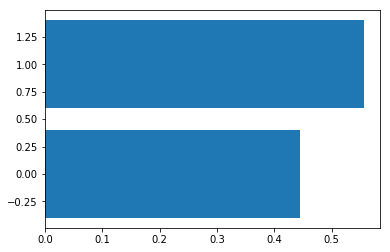

In [116]:
plt.barh(np.arange(len(grid_tree.best_estimator_.feature_importances_)), grid_tree.best_estimator_.feature_importances_)
plt.yticks(np.arange(len(X_train_fin.columns)),X_train_fin.columns)

In [ ]:
#11 Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [117]:
y_pred_lr = grid_lr.best_estimator_.predict(X_test_fin)

In [118]:
y_pred_tree = grid_tree.best_estimator_.predict(X_test_fin)

In [119]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_fin, y_pred_lr)

0.9352450411624952

In [120]:
accuracy_score(y_test_fin, y_pred_tree)

0.946405878777833

In [121]:
from sklearn.metrics import f1_score

print(f1_score(y_test_fin, y_pred_lr, average='macro')) 

print(f1_score(y_test_fin, y_pred_lr, average='micro'))  

print(f1_score(y_test_fin, y_pred_lr, average='weighted'))  

print(f1_score(y_test_fin, y_pred_lr, average=None))

0.483269571175698
0.9352450411624952
0.9039509399735942
[0.96653914 0.        ]


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
print(f1_score(y_test_fin, y_pred_tree, average='macro')) 

print(f1_score(y_test_fin, y_pred_tree, average='micro'))  

print(f1_score(y_test_fin, y_pred_tree, average='weighted'))  

print(f1_score(y_test_fin, y_pred_tree, average=None))

0.6706623210275258
0.946405878777833
0.9329858372618165
[0.97201385 0.36931079]


In [123]:
from sklearn.metrics import precision_score

print(precision_score(y_test_fin, y_pred_lr, average='macro'))  

print(precision_score(y_test_fin, y_pred_lr, average='micro'))  

print(precision_score(y_test_fin, y_pred_lr, average='weighted'))

print(precision_score(y_test_fin, y_pred_lr, average=None))  

0.4676225205812476
0.9352450411624952
0.8746832870190373
[0.93524504 0.        ]


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
print(precision_score(y_test_fin, y_pred_tree, average='macro'))  

print(precision_score(y_test_fin, y_pred_tree, average='micro'))  

print(precision_score(y_test_fin, y_pred_tree, average='weighted'))

print(precision_score(y_test_fin, y_pred_tree, average=None)) 

0.8629400774512278
0.946405878777833
0.9386586068403374
[0.94992387 0.77595628]


In [125]:
from sklearn.metrics import recall_score

print(recall_score(y_test_fin, y_pred_lr, average='macro'))  

print(recall_score(y_test_fin, y_pred_lr, average='micro'))  

print(recall_score(y_test_fin, y_pred_lr, average='weighted'))  

print(recall_score(y_test_fin, y_pred_lr, average=None))

0.5
0.9352450411624952
0.9352450411624952
[1. 0.]


In [126]:
print(recall_score(y_test_fin, y_pred_tree, average='macro'))  

print(recall_score(y_test_fin, y_pred_tree, average='micro'))  

print(recall_score(y_test_fin, y_pred_tree, average='weighted'))  

print(recall_score(y_test_fin, y_pred_tree, average=None))

0.6187382437856518
0.946405878777833
0.946405878777833
[0.99515567 0.24232082]


In [ ]:
#12 Построить Confusion Matrix для ваших результатов

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test_fin, y_pred_lr)

array([[16927,     0],
       [ 1172,     0]])

In [129]:
confusion_matrix(y_test_fin, y_pred_tree)

array([[16845,    82],
       [  888,   284]])